<h1><center>Students performance and difficulties prediction</center></h1>


Algoritma yang digunakan:

- **Supported vector machine**


# Reading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

# Data  <h5 style='color:red;font-family:cursive;font-size:4.5mm'></h5>

**Deskripsi Dataset :**

- `sex` : jenis kelamin siswa (biner: "F" - perempuan or "M" - laki-laki)
- `address` : tipe alamat rumah siswa (biner: "U" - perkotaan or "R" - pedesaan)
- `famsize` : ukuran keluarga (biner: "LE3" - kurang atau sama dengan 3 atau "GT3" - lebih dari 3)
- `Pstatus` : status kohabitasi orang tua (biner: "T" - tinggal bersama or "A" - terpisah)
- `traveltime` : waktu perjalanan dari rumah ke sekolah (numerik: 1 - <15 min., 2 - 15 hingga 30 min., 3 - 30 min. hingga 1 jam, atau 4 - >1 jam)
- `studytime` : waktu belajar mingguan  (numerik: 1 - <2 jam, 2 - 2 hingga 5 jam, 3 - 5 hingga 10 jam, atau 4 - >10 jam)
- `failures` : jumlah kegagalan kelas sebelumnya (numerik: n if 1<=n<3, else 4)
- `famsup` : dukungan pendidikan dari keluarga (biner: yes or no)
- `paid` : kelas tambahan berbayar dalam mata pelajaran(matematika atau bahasa inggris) (biner: yes or no)
- `activities` : kegiatan ekstrakurikuler (biner: yes or no)
- `higher` :  keinginan mengambil pendidikan tinggi  (biner: yes or no)
- `internet` : akses internet di rumah (biner: yes or no)
- `romantic` : memiliki hubungan asmara (biner: yes or no)
- `famrel` : kualitas hubungan keluarga (numerik: dari 1 - sangat buruk ke 5 - sangat baik)
- `freetime` :waktu luang setelah sekolah (numerik: dari 1 - sangat rendah ke 5 - sangat tinggi)
- `goout` : pergi keluar dengan teman-teman(numerik: dari 1 - sangat rendah ke 5 - sangat tinggi)
- `health` : status kesehatan saat ini (numerik: dari 1 - sangat buruk to 5 - very good)
- `absences` : jumlah ketidakhadiran di sekolah (numerik: dari 0 ke 93)

**Kolom terakhir:**
- `passed` : Apakah siswa lulus ujian akhir atau tidak (biner: yes or no)

**Displaying the dataset**

In [2]:
df = df.drop(columns = ['school','age','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'Dalc', 'Walc', 'nursery', 'schoolsup'])

In [3]:
df

sex address famsize Pstatus  traveltime  studytime  failures famsup paid  \
0     F       U     GT3       A           2          2         0     no   no   
1     F       U     GT3       T           1          2         0    yes   no   
2     F       U     LE3       T           1          2         3     no  yes   
3     F       U     GT3       T           1          3         0    yes  yes   
4     F       U     GT3       T           1          2         0    yes  yes   
..   ..     ...     ...     ...         ...        ...       ...    ...  ...   
390   M       U     LE3       A           1          2         2    yes  yes   
391   M       U     LE3       T           2          1         0     no   no   
392   M       R     GT3       T           1          1         3     no   no   
393   M       R     LE3       T           3          1         0     no   no   
394   M       U     LE3       T           1          1         0     no   no   

    activities higher internet romantic  famrel  freetime  goout  health  \
0           no    yes       no       no       4         3      4       3   
1           no    yes      yes       no       5         3      3       3   
2           no    yes      yes       no       4         3      2       3   
3          yes    yes      yes      yes       3         2      2       5   
4           no    yes       no       no       4         3      2       5   
..         ...    ...      ...      ...     ...       ...    ...     ...   
390         no    yes       no       no       5         5      4       4   
391         no    yes      yes       no       2         4      5       2   
392         no    yes       no       no       5         5      3       3   
393         no    yes      yes       no       4         4      1       5   
394         no    yes      yes       no       3         2      3       5   

     absences passed  
0           6     no  
1           4     no  
2          10    yes  
3           2    yes  
4           4    yes  
..        ...    ...  
390        11     no  
391         3    yes  
392         3     no  
393         0    yes  
394         5     no  

[395 rows x 19 columns]

## Data processing <h5 style='color:red;font-family:cursive;font-size:4.5mm'></h5>

## Ubah data non-numerik menjadi data numerik <h6 style='color:red;font-family:cursive;font-size:4.5mm'></h6>

In [4]:
# mapping strings to numeric values:
def numerical_data():
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col


# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

**digitization of values**

In [5]:
# All values in numerical after calling numerical_data() function
numerical_data()
df

sex  address  famsize  Pstatus  traveltime  studytime  failures  famsup  \
0      1        0        1        1           2          2         0       0   
1      1        0        1        0           1          2         0       1   
2      1        0        0        0           1          2         3       0   
3      1        0        1        0           1          3         0       1   
4      1        0        1        0           1          2         0       1   
..   ...      ...      ...      ...         ...        ...       ...     ...   
390    0        0        0        1           1          2         2       1   
391    0        0        0        0           2          1         0       0   
392    0        1        1        0           1          1         3       0   
393    0        1        0        0           3          1         0       0   
394    0        0        0        0           1          1         0       0   

     paid  activities  higher  internet  romantic  famrel  freetime  goout  \
0       0           0       1         0         0       4         3      4   
1       0           0       1         1         0       5         3      3   
2       1           0       1         1         0       4         3      2   
3       1           1       1         1         1       3         2      2   
4       1           0       1         0         0       4         3      2   
..    ...         ...     ...       ...       ...     ...       ...    ...   
390     1           0       1         0         0       5         5      4   
391     0           0       1         1         0       2         4      5   
392     0           0       1         0         0       5         5      3   
393     0           0       1         1         0       4         4      1   
394     0           0       1         1         0       3         2      3   

     health  absences  passed  
0         3         6       0  
1         3         4       0  
2         3        10       1  
3         5         2       1  
4         5         4       1  
..      ...       ...     ...  
390       4        11       0  
391       2         3       1  
392       3         3       0  
393       5         0       1  
394       5         5       0  

[395 rows x 19 columns]

**Features scalling**

In [6]:
# Let's scal our features
feature_scaling(df)

# Now we are ready for models training
df

sex  address  famsize  Pstatus  traveltime  studytime  failures  famsup  \
0    1.0      0.0      1.0      1.0    0.333333   0.333333  0.000000     0.0   
1    1.0      0.0      1.0      0.0    0.000000   0.333333  0.000000     1.0   
2    1.0      0.0      0.0      0.0    0.000000   0.333333  1.000000     0.0   
3    1.0      0.0      1.0      0.0    0.000000   0.666667  0.000000     1.0   
4    1.0      0.0      1.0      0.0    0.000000   0.333333  0.000000     1.0   
..   ...      ...      ...      ...         ...        ...       ...     ...   
390  0.0      0.0      0.0      1.0    0.000000   0.333333  0.666667     1.0   
391  0.0      0.0      0.0      0.0    0.333333   0.000000  0.000000     0.0   
392  0.0      1.0      1.0      0.0    0.000000   0.000000  1.000000     0.0   
393  0.0      1.0      0.0      0.0    0.666667   0.000000  0.000000     0.0   
394  0.0      0.0      0.0      0.0    0.000000   0.000000  0.000000     0.0   

     paid  activities  higher  internet  romantic  famrel  freetime  goout  \
0     0.0         0.0     1.0       0.0       0.0    0.75      0.50   0.75   
1     0.0         0.0     1.0       1.0       0.0    1.00      0.50   0.50   
2     1.0         0.0     1.0       1.0       0.0    0.75      0.50   0.25   
3     1.0         1.0     1.0       1.0       1.0    0.50      0.25   0.25   
4     1.0         0.0     1.0       0.0       0.0    0.75      0.50   0.25   
..    ...         ...     ...       ...       ...     ...       ...    ...   
390   1.0         0.0     1.0       0.0       0.0    1.00      1.00   0.75   
391   0.0         0.0     1.0       1.0       0.0    0.25      0.75   1.00   
392   0.0         0.0     1.0       0.0       0.0    1.00      1.00   0.50   
393   0.0         0.0     1.0       1.0       0.0    0.75      0.75   0.00   
394   0.0         0.0     1.0       1.0       0.0    0.50      0.25   0.50   

     health  absences  passed  
0      0.50  0.003882     0.0  
1      0.50 -0.022785     0.0  
2      0.50  0.057215     1.0  
3      1.00 -0.049451     1.0  
4      1.00 -0.022785     1.0  
..      ...       ...     ...  
390    0.75  0.070549     0.0  
391    0.25 -0.036118     1.0  
392    0.50 -0.036118     0.0  
393    1.00 -0.076118     1.0  
394    1.00 -0.009451     0.0  

[395 rows x 19 columns]

# Data visualisation  <h5 style='color:red;font-family:cursive;font-size:4.5mm'>Réaliser par el "nabaoui nouhaila" et "boujida hafssa" good lecture:) </h5>

## 1) data inspection

In [7]:
df.shape

(395, 19)

In [8]:
df.dropna().shape # their is no null value

(395, 19)

In [9]:
df.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'failures', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'passed'],
      dtype='object')

In [10]:
features=['sex','address', 'famsize', 'Pstatus','traveltime', 'studytime',
       'failures', 'famsup', 'paid', 'activities',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']

## 2)features visualisation


In [11]:
#plot of student status
dfv['passed'].value_counts()

passed
yes    265
no     130
Name: count, dtype: int64

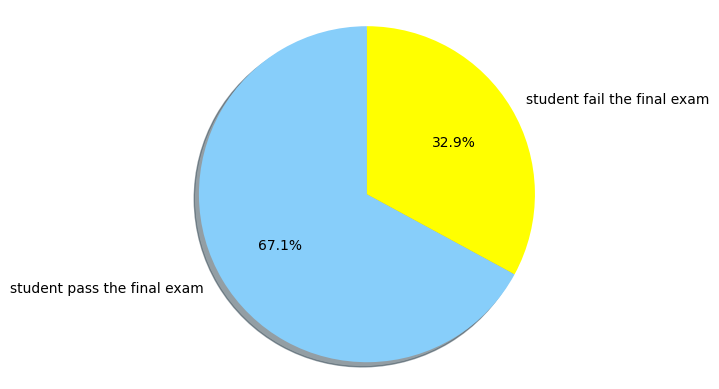

In [12]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 ### a)Correlation heatmap

   #### -a.1) general hetmap

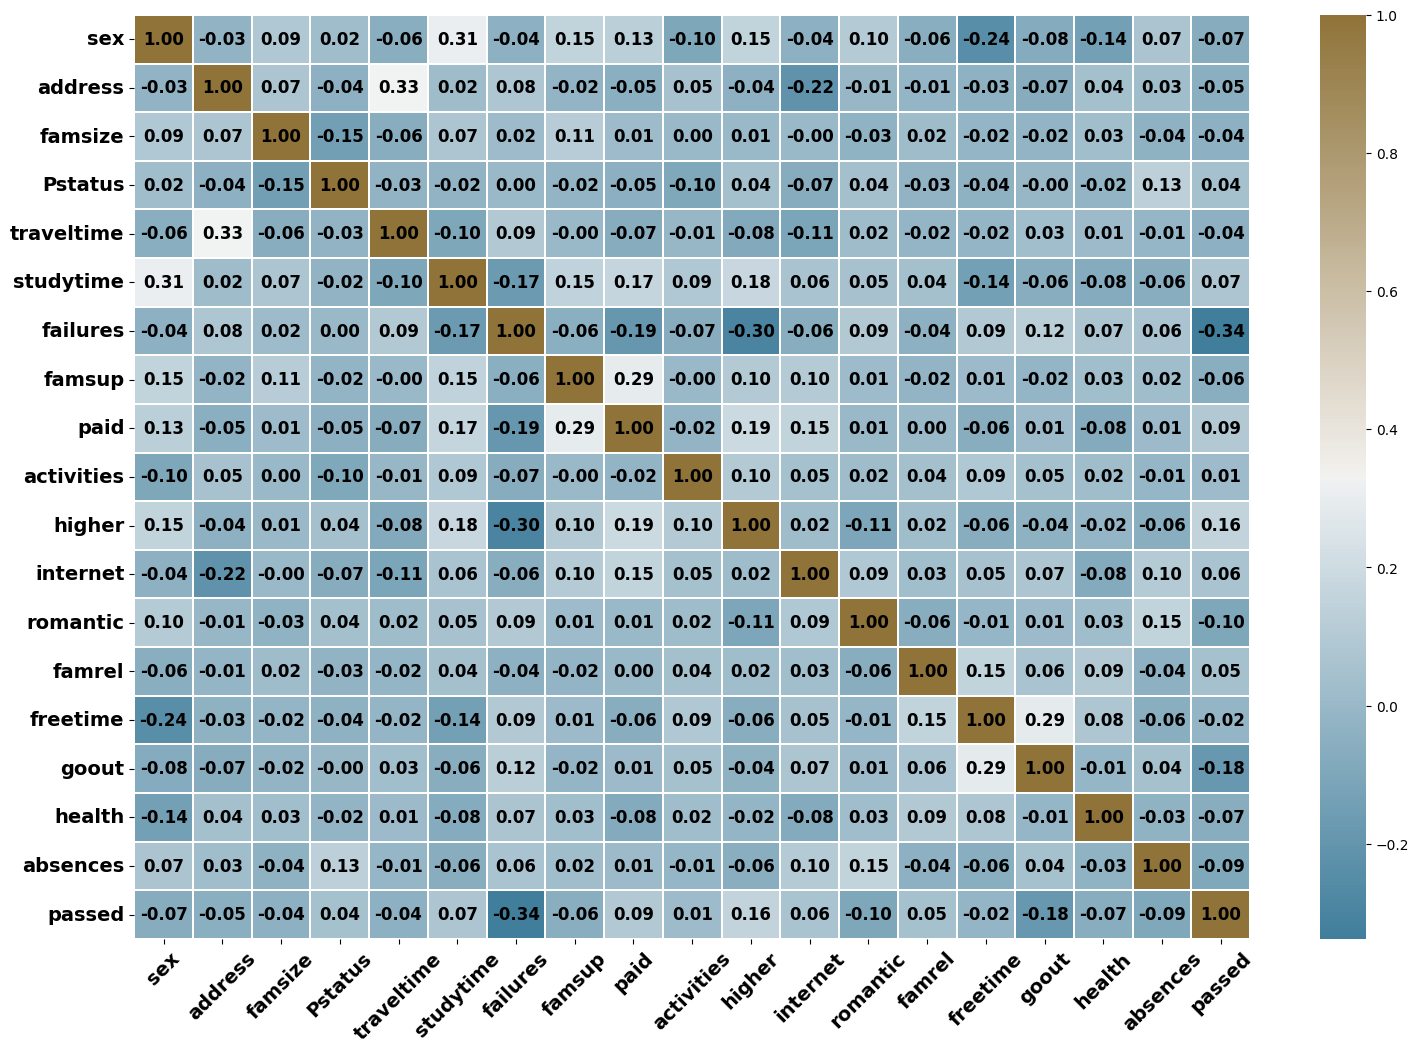

In [13]:
# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()


#### a.2)correlation between student status and other features

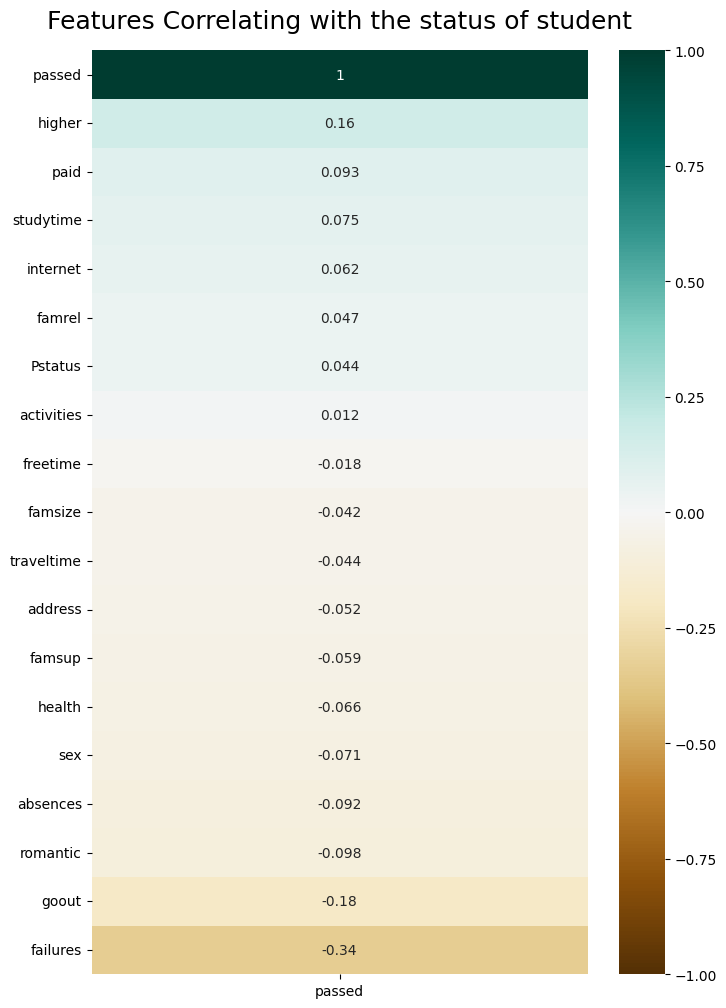

In [14]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

Berdasarkan heatmap ini, fitur-fitur yang paling berpengaruh terhadap status siswa:

**tiga fitur paling berpengaruh secara positif**:

-Siswa yang ingin melanjutkan pendidikan tinggi juga memiliki nilai yang baik, jadi akan lebih baik untuk memberi tahu siswa betapa hebat dan menyenangkannya mengambil pendidikan tinggi.

-siswa yang mengambil kelas ekstra berbayar dan belajar lebih lama per-minggu memiliki performa yang lebih baik


**tiga fitur paling berpengaruh secara negatif**:

-memiliki hubungan asmara dan sering keluar dengan teman dapat berdampak buruk untuk performa siswa

-ketidakhadiran kelas juga dapat memengaruhi kegagalan

#### b.1) Student status  By goout

In [15]:
df["goout"].unique()

array([0.75, 0.5 , 0.25, 0.  , 1.  ])

Text(0.5, 0, 'Student status')

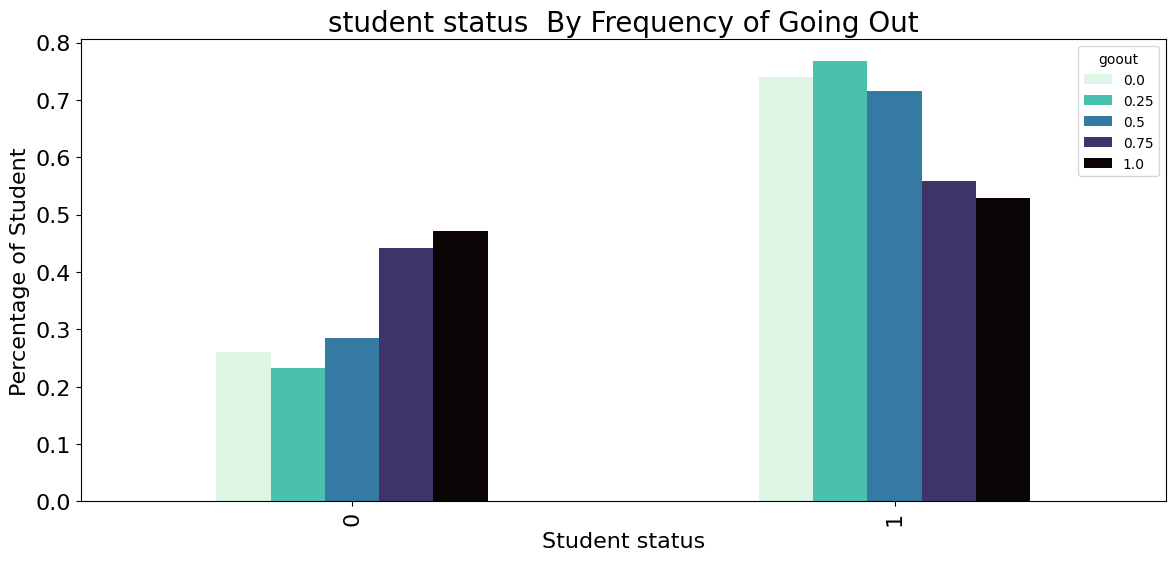

In [16]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

Terlihat bahwa siswa yang lolos ujian adalah siswa yang jarang keluar dengan teman

#### b.2)Student status by romantic relation:

<Figure size 640x480 with 0 Axes>

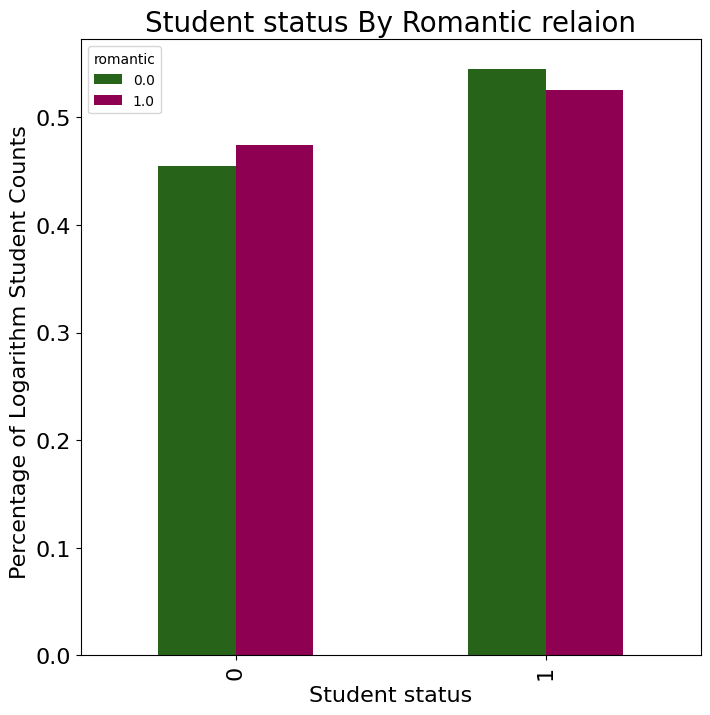

In [17]:
# romantic status
romance_tab1 = pd.crosstab(index=df.passed, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student status By Romantic relaion', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
# 0 in romantic mean no romantic relation

Siswa yang lolos ujian kebanyakan tidak memiliki hubungan asmara, jadi lebih baik tidak punya pacar agar lolos ujian


#### b.3)Student status by deseire to take heigher education:

In [18]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

kebanyakan yang lolos ujian adalah siswa yang memiliki motivasi untuk melanjutkan pendidikan yang lebih tinggi, jadi penting untuk memberikan semangat agar siswa terus mengejar pendidikan lebih lanjut

#### b.4) Student status by failures:

Text(0, 0.5, 'Percentage of Student')

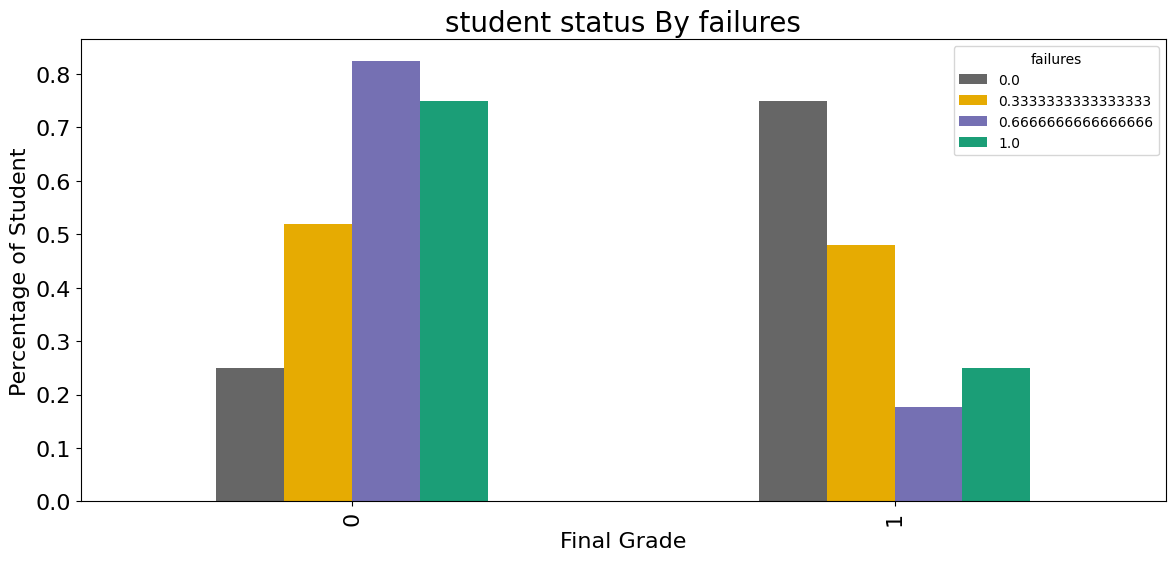

In [19]:
fail_tab = pd.crosstab(index=df.passed, columns=df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

kebanyakan siswa yang lolos ujian tidak pernah mengalami kegagalan, jadi penting untuk belajar dengan keras dan memiliki nilai bagus

#### b.5) Student status by area


Text(0.5, 1.0, 'Address Distribution')

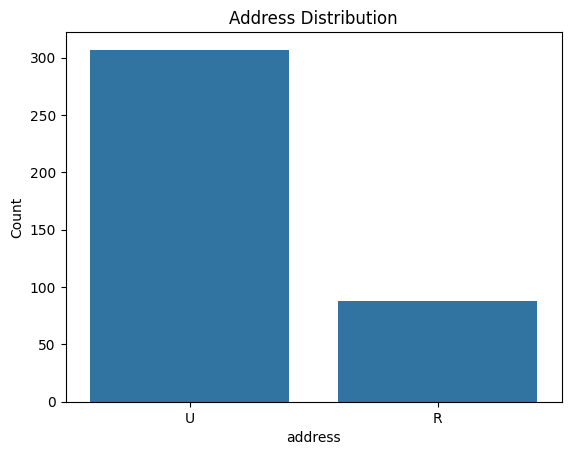

In [20]:
#first let's see the destribution of students who live in urban or rural area
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=dfv, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

Text(0.5, 0, 'Student status')

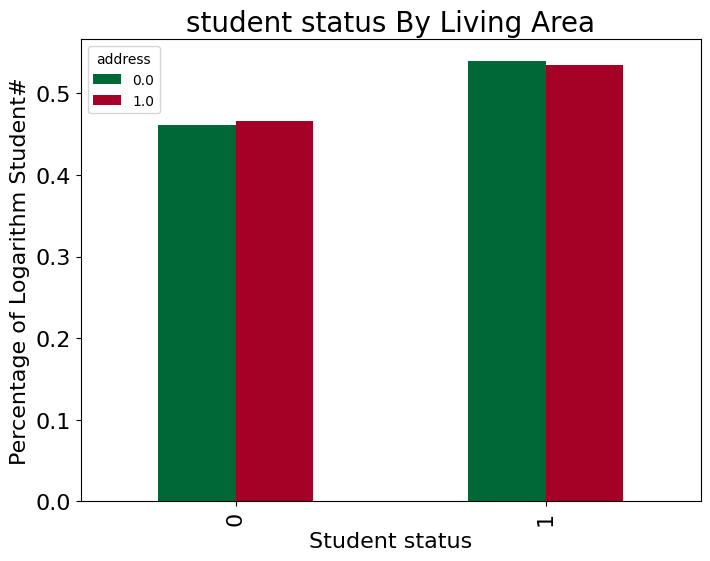

In [21]:
ad_tab1 = pd.crosstab(index=df.passed, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('student status By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Student status', fontsize=16)

tempat tinggal siswa tidak begitu berpengaruh terhadap performa akademik sekalipun yang tinggal di daerah pedesaan

#### b.6) Student status by internet accessibility:

In [22]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


Text(0, 0.5, 'Percentage of Student')

C9:Most of people who passed the exam had the accessibility to internet ,sow we should provide a fair materials's education
kebanyakan siswa yang lolos ujian memiliki akses internet, jadi penting untuk menyediakan fasilitas yang adil tiap sekolah

#### b.7) Student status by weekly Study time :

Text(0, 0.5, 'Percentage of Student')

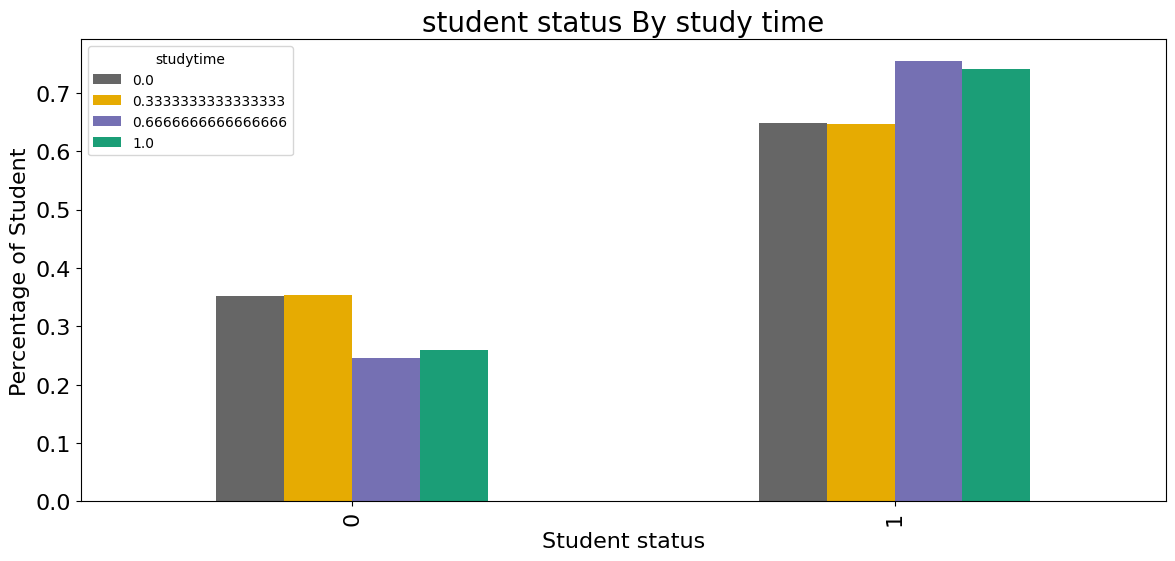

In [23]:
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


banyak siswa yang lolos ujian karena belajar 5-10 jam per-minggu

#### b.8)Student status by health:

In [24]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


Text(0, 0.5, 'Percentage of Student')

banyak siswa yang gagal dalam ujian tidak memiliki kesehatan yang baik

In [25]:
#making summary for good condition to reach heigh academic potentials:

### 3) General conclusion :

#### Summary:

Setelah menganalisis fitur-fitur yang paling relevan, siswa yang sangat baik untuk potensi akademik tinggi kemungkinan besar memiliki profil sebagai berikut:

1.Tidak sering-sering keluar dengan teman

2.Tidak dalam hubungan asmara

3.Memiliki motivasi tinggi untuk melanjutkan pendidikan lebih tinggi

4.Tidak pernah membolos sekolah

5.Memiliki akses ke internet

6.belajar lebih dari 10 jam per-minggu

7.sehat

# Support vector machine



- We will explain each of these functions very well inside the following cell itself :

In [26]:

# ------------------------------------------------------------------------------------------------------------------------------
# Show results of model

def showResults(accuracy, trainingTime, y_pred,model):

    print('------------------------------------------------Results :',model,'-------------------------------------------------')
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print('\n The ROC curve is :\n')
    fig, _ = plt.subplots()
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label=model)
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    fig.suptitle('ROC curve: '+str(model))
    plt.show()

    print('----------------------------------------------')
    print('The model  accuracy:', round(accuracy),'%')
    print('----------------------------------------------')
    print('The training time is: ',trainingTime)
    print('----------------------------------------------')
    print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    print('----------------------------------------------')
    print('The roc_auc_score is :',round(100*roc_auc_score(y_test, y_pred))/100)
    print('----------------------------------------------')
    print('The confusion matrix is :\n')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)



# ------------------------------------------------------------------------------------------------------------------------------
# Hyperparameter Tuning :
# C, degree and gamma are the parameters that are used in SVM classffier 'svc(C=..,..),svc(C,degree=..)',svc(C,gamma=..)
# The following functions will return those values that minimize the error on (X_val,y_val) set
# So this (X_val,y_val) set will be used to get the optimal SVM parameters before evaluating the model on the test set


# Optimal C
def optimal_C_value():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    minError = float('Inf')
    optimal_C = float('Inf')

    for c in Ci:
        clf = SVC(C=c,kernel='linear')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        error = np.mean(np.double(predictions != y_val))
        if error < minError:
            minError = error
            optimal_C = c
    return optimal_C


# Optimal C and the degree of the polynomial
def optimal_C_d_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Di = np.array(( 2, 5, 10, 15, 20, 25, 30))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_d = float('Inf')

    for d in Di:
        for c in Ci:
            clf = SVC(C=c,kernel='poly', degree=d)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_d = d
    return optimal_C,optimal_d


# Optimal C and gamma
def optimal_C_gamma_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Gi = np.array(( 0.000001,0.00001,0.01,1,2,3,5,20,70,100,500,1000))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_g = float('Inf')

    for g in Gi:
        for c in Ci:
            clf = SVC(C=c,kernel='rbf', gamma=g)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_g = g
    return optimal_C,optimal_g


# ------------------------------------------------------------------------------------------------------------------------------
# svm factor : factor affecting students performance


# 1) factor as svm coefficients
def factors(array, K, max_or_min, df):

    n = array.shape[1]
    array = array.reshape(n,1)
    my_list = array.tolist()

    if max_or_min == 'max':
        temp = sorted(my_list)[-K:]
        res = []
        for ele in temp:
            res.append(my_list.index(ele))
        return(get_factors(res, df))


    elif max_or_min == 'min':
        temp = sorted(my_list, reverse=True)[-K:]
        temp = temp = np.array(temp).reshape(K,1)
        res = []
        for ele in temp:
            if ele<0:
                res.append(my_list.index(ele))
        return(get_factors(res, df))


    else:
        return


# 2) converts those factors to dataset columns name
def get_factors(index, df):
    f = []
    for i in index:
        f.append(df.columns[i])
    return f


# 3) Convert column names to understandable string

columns_name = {'famsize': 'family size', 'Pstatus': "parent's cohabitation status ",
                'famsup': 'family educational support',
                'paid': 'extra paid classes within the course subject', 'higher': 'wants to take higher education',
                'romantic': 'with a romantic relationship ', 'famrel': 'quality of family relationships', 'goout': 'going out with friends',
               }


def column_to_string(fcts,max_or_min):

    if max_or_min == 'max':
        print('-----------------------------------------------------------------------------------')
        print('Factors helping students succeed :')
    else:
        print('-----------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------')
        print('Factors leading students to failure')

    for fct in fcts:
        if fct in columns_name:
            print(columns_name[fct])
        else:
            print(fct)


# ------------------------------------------------------------------------------------------------------------------------------
# Splitting the data for SVM
# Here We will split data into test set, cross validation (X_val, y_val) set and training set
# The cross validation (X_val, y_val) is used for choosing the optimal value for svm parameters C, degree and gamma

def split(df,rest_size,test_size,randomState):
    data = df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)

    return X_train,X_val,X_test,y_train,y_val,y_test
# We will use the three different svm classifier kernels
# Linear kernel, polynomial kernel and gaussian kernel and we will choose the most accurate

<h2><span style='color:#b846a3;font-family:Comic Sans MS'>1) Model evaluation: :</span></h2>

For model evaluation we will calculate :

- <span style='color:red'>**Training time**</span>
- <span style='color:red'>**Accuracy**</span>
- <span style='color:red'>**Confusion matrix**</span>
- <span style='color:red'>**ROC curve**</span>
- <span style='color:red'>**ROC score**</span>
- <span style='color:red'>**f1 score**</span>

<h2><span style='color:#b846a3;font-family:Comic Sans MS'>2) Training phase :</span></h2>

<h3><span style='color:#0759e6;font-family:Rockwell'>Linear Kernel :</span></h3>

------------------------------------------------Results : SVM linear kernel -------------------------------------------------

 The ROC curve is :



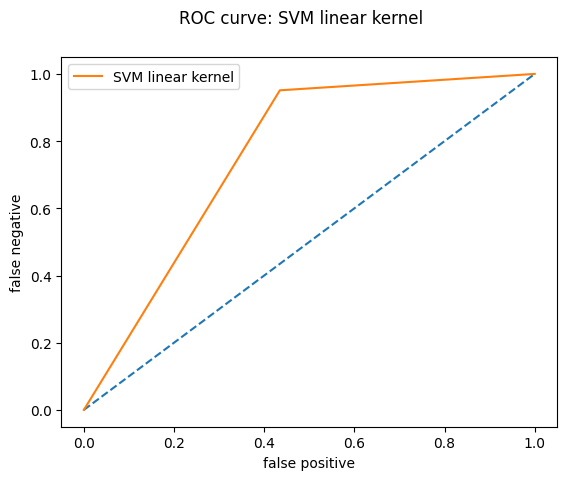

----------------------------------------------
The model  accuracy: 81 %
----------------------------------------------
The training time is:  4ms
----------------------------------------------
The f1 score is : 0.78
----------------------------------------------
The roc_auc_score is : 0.76
----------------------------------------------
The confusion matrix is :



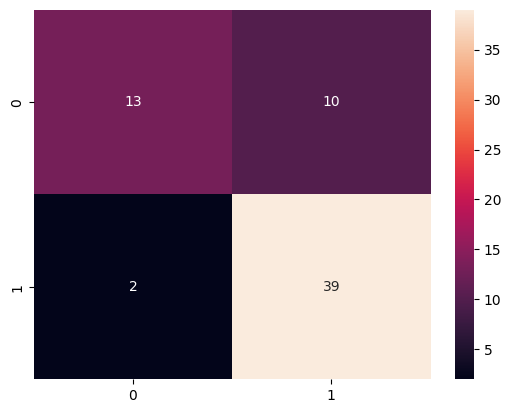

In [27]:
###################################################### Linear kernel ###########################################################
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# We already tune parameters, we do not need to loop over all the hyperparamters again,
# if you want to do so just set max_iteration to 2000 for example
# and remove the line 'optimal_split_state = 388628375' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')

for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+' Current f1 '+str(maxF1), end="\r")
    # Let's get the optimal C value for the linear kernal
    split_state = np.random.randint(1,1000000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)
    optimal_C = optimal_C_value()


    # Now let's use the optimal C value
    linear_clf = SVC(C=optimal_C,kernel='linear')

    # Let's train the model with the optimal C value and calculate the training time
    tic = time()
    linear_clf.fit(X_train, y_train)
    toc = time()
    time1 = str(round(1000*(toc-tic))) + "ms"
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear)*100
    if linear_accuracy>maxAccuracy and linear_f1>maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state
    if maxAccuracy>86 and maxF1>80:
        break;

# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long.
# The optimal split state for linear kernel is 388628375
# Let's try that split state
optimal_split_state1 = 388628375
X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
optimal_C = optimal_C_value()


# Now let's use the optimal C value
linear_clf = SVC(C=optimal_C,kernel='linear')

# Let's train the model with the optimal C value and calculate the training time
tic = time()
linear_clf.fit(X_train, y_train)
toc = time()
time1 = str(round(1000*(toc-tic))) + "ms"
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(linear_accuracy, time1, y_linear,'SVM linear kernel')

<h2><span style='color:#b846a3;font-family:Comic Sans MS'>3) Factors affecting performances of studens using SVM classifer : </span></h2>
<h5 style='color:red;font-family:cursive;font-size:4.5mm'></h5>


<h4 style='color:red'>Test the function :</h4>
    
   - Let's take three factors for the two classes ($class\ 0: did\ not\ passed, class 1: passed$):

In [29]:
# Get svm parameters
coefs = linear_clf.coef_

# factors helping students to succeed
column_to_string(factors(coefs, 3, 'max', df),'max')

# factors leading students to failure
column_to_string(factors(coefs, 3, 'min', df), 'min')

-----------------------------------------------------------------------------------
Factors helping students succeed :
internet
wants to take higher education
freetime
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Factors leading students to failure
going out with friends
absences
failures


**Conclusion :**

- ****1)**** For **<span style='color:red'>positive impact</span>**, it seems that the factors helping students succeed: <br><br>
   - **Internet**  : Siswa yang memiliki akses ke internet mungkin mendapatkan informasi yang lebih luas dan banyak sehingga banyak yang lolos ujian akhir.
   - **Wants to take higher education** : Siswa yang memiliki tujuan untuk sekolah lebih tinggi akan termotivasi untuk memiliki impian yang harus dicapai.

   - **Free time** : Siswa yang memiliki waktu luang setelah sekolah mungkin menggunakan waktu luangnya untuk belajar mandiri dan tidak menghabiskan waktu seperti bermain atau berpacaran sehingga performanya lebih bagus.

   
    
<br><br>
- ****2)**** For **<span style='color:red'>negative impact</span>**, it seems that the factors affecting students are: <br><br>
    
    - **Going out with friends** : Bermain dengan teman memang menyenangkan tetapi seringkali siswa terlalu menghabiskan banyak waktu untuk berpergian dan bermain yang tentunya akan memengaruhi pendidikan mereka.

    - **Absences** : Siswa yang sering membolos atau izin sekolah akan ketinggalan materi dan akhirnya kesulitan ketika mengambil ujian, sehingga harus mengejar ketertinggalan yang biasanya malah mengalami stres.

    - **Failures** : Memiliki banyak kegagalan ujian merupakan indikasi dari kurangnya kesiapan ujian
    


  
<h6>Saran-saran untuk siswa, orang tua, dan administrasi sekolah:</h6>


   - Pemerintah harus membantu siswa yang orang tuanya kurang mampu, dengan menyediakan akses internet dan peluang untuk pendidikan tinggi.
   - Administrasi sekolah harus mengirim peringatan kepada orang tua ketika siswa mencapai jumlah ketidakhadiran maksimum yang dapat diterima sebelum periode ujian dimulai.
   - Ketika siswa mengalami banyak kegagalan, administrasi sekolah dan guru harus mencari tahu masalah yang dihadapi oleh siswa tersebut dan juga menghubungi orang tua untuk mendapatkan informasi lebih lanjut.
   - Siswa harus memiliki ruang yang sesuai untuk belajar di rumah, seperti meja atau area kecil di mana mereka bisa fokus pada studi mereka. ketidaknyamanan dirumah memungkinkan siswa jadi lebih ingin bermain dan pergi keluar dengan teman ketimbang belajar.